In [12]:
import pandas as pd
from utils.augment_price_data import augment_price_data, obtain_syn_data, labeling_function, tech_indicator_calc
from utils.plotter import plotter

#df = pd.read_csv('gs://ta-charts-data/augmented_data/aug_1/*.csv')
df = pd.read_csv('gs://ta-charts-data/origin_data/*.csv')
#df['datetime'] = pd.to_datetime(df['datetime'])
df

,index,close,open,high,low,volume,datetime,time
0,57,143.53,143.53,143.53,143.50,275300.0,2000-01-04 09:35:00,0.128205
1,58,143.25,143.56,143.78,143.22,124000.0,2000-01-04 09:40:00,0.256410
2,59,143.56,143.31,143.66,143.22,89200.0,2000-01-04 09:45:00,0.384615
3,60,143.94,143.50,144.06,143.50,67600.0,2000-01-04 09:50:00,0.512821
4,61,143.97,144.00,144.06,143.69,145100.0,2000-01-04 09:55:00,0.641026
...,...,...,...,...,...,...,...,...
469336,469393,473.29,473.56,473.65,473.28,267886.0,2023-12-22 15:40:00,9.487179
469337,469394,473.38,473.29,473.38,472.98,381083.0,2023-12-22 15:45:00,9.615385
469338,469395,473.14,473.38,473.51,473.10,336791.0,2023-12-22 15:50:00,9.743590
469339,469396,473.60,473.12,473.68,473.06,667197.0,2023-12-22 15:55:00,9.871795


In [6]:
start_date='2000-01-04'
end_date='2023-12-22'
spy_df_synth = obtain_syn_data(original_df=df, lam=0.5, start_date=start_date, end_date=end_date)
spy_df_synth

100%|██████████| 6032/6032 [21:20<00:00,  4.71it/s] 


Augmented: 469341
Original: 469341


,open,high,low,close,datetime,volume
0,143.506823,143.503188,143.528005,143.558727,2000-01-04 09:35:00,275300.0
1,143.591615,143.814018,143.205129,143.241738,2000-01-04 09:40:00,124000.0
2,143.277445,143.657899,143.217984,143.553914,2000-01-04 09:45:00,89200.0
3,143.481162,144.064862,143.475737,143.934362,2000-01-04 09:50:00,67600.0
4,144.005599,144.027539,143.688288,143.984445,2000-01-04 09:55:00,145100.0
...,...,...,...,...,...,...
469336,473.553859,473.649614,473.282143,473.277689,2023-12-22 15:40:00,267886.0
469337,473.313872,473.416584,472.988452,473.416630,2023-12-22 15:45:00,381083.0
469338,473.347260,473.537418,473.042891,473.137502,2023-12-22 15:50:00,336791.0
469339,473.170950,473.617496,473.077694,473.555844,2023-12-22 15:55:00,667197.0


In [7]:
spy_df_synth_labeled = labeling_function(spy_df_synth, label_name='label')

100%|██████████| 468867/468867 [58:48<00:00, 132.87it/s]  


In [8]:
df_labeled = labeling_function(df, label_name='label')

100%|██████████| 468867/468867 [57:34<00:00, 135.73it/s]  


In [47]:
stats_of_dic = {}
stats_of_dic['name'] = 'aug_1'
stats_of_dic['size'] = len(df_aug)
stats_of_dic['no_signals'] = len(df_aug[df_aug['label'] == 0])
stats_of_dic['buy_signals'] = len(df_aug[df_aug['label'] == 1])
stats_of_dic['sell_signals'] = len(df_aug[df_aug['label'] == 2])
stats_of_dic['buy_signals_ratio'] = stats_of_dic['buy_signals'] / stats_of_dic['size']
stats_of_dic['sell_signals_ratio'] = stats_of_dic['sell_signals'] / stats_of_dic['size']
stats_of_dic['no_signals_ratio'] = stats_of_dic['no_signals'] / stats_of_dic['size']

# Differences between the two data
for i in ['open', 'high', 'low', 'close']:
    s = df_origin[i]
    s_r = df_aug[i]

    err = sum(abs(s-s_r))/len(s)
    max_err = max(abs(s-s_r))

    stats_of_dic[i + '_MAE'] = err
    stats_of_dic[i + '_MA_MAX'] = max_err
    
stats_of_dic

{'name': 'aug_1',
 'size': 469341,
 'no_signals': 194015,
 'buy_signals': 141162,
 'sell_signals': 134164,
 'buy_signals_ratio': 0.30076639373078423,
 'sell_signals_ratio': 0.2858561259297611,
 'no_signals_ratio': 0.4133774803394547,
 'open_MAE': 0.016026158527910273,
 'open_MA_MAX': 0.6596092091792798,
 'high_MAE': 0.013199708588166884,
 'high_MA_MAX': 0.6578782649490051,
 'low_MAE': 0.014104574068479953,
 'low_MA_MAX': 0.596550117377916,
 'close_MAE': 0.0159846929592665,
 'close_MA_MAX': 0.6689326900342962}

In [48]:
stats_of_dic1 = {}
stats_of_dic1['name'] = 'origin'
stats_of_dic1['size'] = len(df_origin)
stats_of_dic1['no_signals'] = len(df_origin[df_origin['label'] == 0])
stats_of_dic1['buy_signals'] = len(df_origin[df_origin['label'] == 1])
stats_of_dic1['sell_signals'] = len(df_origin[df_origin['label'] == 2])
stats_of_dic1['buy_signals_ratio'] = stats_of_dic1['buy_signals'] / stats_of_dic1['size']
stats_of_dic1['sell_signals_ratio'] = stats_of_dic1['sell_signals'] / stats_of_dic1['size']
stats_of_dic1['no_signals_ratio'] = stats_of_dic1['no_signals'] / stats_of_dic1['size']

stats_of_dic1

{'name': 'origin',
 'size': 469341,
 'no_signals': 192843,
 'buy_signals': 141910,
 'sell_signals': 134588,
 'buy_signals_ratio': 0.30236011769694104,
 'sell_signals_ratio': 0.2867595202635184,
 'no_signals_ratio': 0.41088036203954054}

In [71]:
# Write JSON to a file
with open("stats", "w") as json_file:
    json.dump(stats_of_dic, json_file)
with open("stats1", "w") as json_file:
    json.dump(stats_of_dic1, json_file)

In [74]:
# Read the JSON file into a Python dictionary
with open('stats', 'r') as file:
    data = json.load(file)
with open('stats1', 'r') as file:
    data1 = json.load(file)
# Create a DataFrame from the dictionary
pd.concat([pd.DataFrame([data]), pd.DataFrame([data1])],  ignore_index=True)

,name,size,no_signals,buy_signals,sell_signals,buy_signals_ratio,sell_signals_ratio,no_signals_ratio,open_MAE,open_MA_MAX,high_MAE,high_MA_MAX,low_MAE,low_MA_MAX,close_MAE,close_MA_MAX
0,aug_1,469341,194015,141162,134164,0.300766,0.285856,0.413377,0.016026,0.659609,0.0132,0.657878,0.014105,0.59655,0.015985,0.668933
1,origin,469341,192843,141910,134588,0.302360,0.286760,0.410880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df = tech_indicator_calc(df)

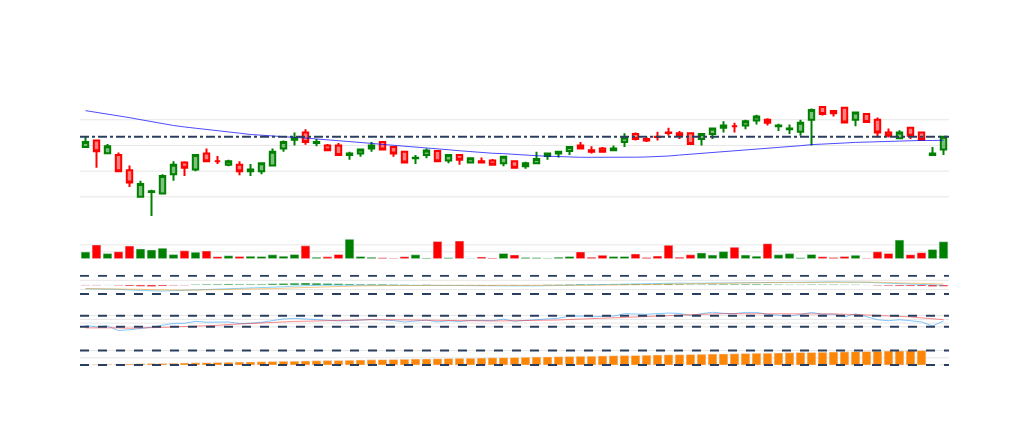

In [11]:
plotter(df.iloc[79:79*2], 448, 448)

In [1]:
import pandas as pd
df = pd.read_csv("gs://ta-charts-data/395026259848/data-preprocess-pipeline-20240130200847/obtain-ta-2_4216879430439534592/data_with_ta")
df['datetime'] = pd.to_datetime(df['datetime'])

In [2]:
start_date = '2000-01-04'
end_date = '2021-12-22'
start_date = pd.to_datetime(start_date).date()
end_date = pd.to_datetime(end_date).date()
df = df[(df['datetime'].dt.date >= start_date) & (df['datetime'].dt.date <= end_date)]

In [3]:
df.head()

,index,datetime,open,high,low,close,volume,label,MA50,MA200,macd_diff,macd,macd_signal,stoch,stoch_signal
0,0,2000-01-04 09:35:00,143.544340,143.471206,143.561389,143.535482,275300.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2000-01-04 09:40:00,143.519809,143.788301,143.190132,143.236983,124000.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2000-01-04 09:45:00,143.395059,143.752474,143.196831,143.533086,89200.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2000-01-04 09:50:00,143.498726,144.008859,143.489017,143.916793,67600.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2000-01-04 09:55:00,143.949069,144.051597,143.700638,144.011205,145100.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
num_of_bars_for_day = 78
num_of_bars_for_week = num_of_bars_for_day * 5
    
buy_datetime_list = df.iloc[num_of_bars_for_week:-num_of_bars_for_day].loc[df['label'] == 1].datetime.to_list()
sell_datetime_list = df.iloc[num_of_bars_for_week:-num_of_bars_for_day].loc[df['label'] == 2].datetime.to_list()
no_action_datetime_list = df.iloc[num_of_bars_for_week:-num_of_bars_for_day].loc[df['label'] == 0].datetime.to_list()

In [5]:
from utils.augment_price_data import augment_price_data, obtain_syn_data, labeling_function, tech_indicator_calc
from utils.plotter import plotter

date = buy_datetime_list[0]
label = df[df['datetime'] == date]['label'].item()
date_str = date.strftime('%Y-%m-%d_%H-%M-%S')
fig = plotter(df[df['datetime'] <= date].iloc[-num_of_bars_for_week:], 448, 448)
fig.show()

KeyError: 'time'

In [7]:
from utils.augment_price_data import augment_price_data, obtain_syn_data, labeling_function, tech_indicator_calc
from utils.plotter import plotter
import concurrent.futures
import os
import plotly.io as pio

def task(date):
    label = df[df['datetime'] == date]['label'].item()
    date_str = date.strftime('%Y-%m-%d_%H-%M-%S')
    fig = plotter(df[df['datetime'] <= date].iloc[-num_of_bars_for_week:], 448, 448)
        
    if label == 1:
        if not os.path.exists('plot' + "/1/"): os.makedirs('plot' + "/1/")
        pio.write_image(fig, 'plot' + "/1/" + date_str + "_1.png") 
        print(date_str + "_1.png saved")
    elif label == 2:
        if not os.path.exists('plot' + "/2/"): os.makedirs('plot' + "/2/")
        pio.write_image(fig, 'plot' + "/2/" + date_str + "_2.png") 
        print(date_str + "_2.png saved")
    else:
        if not os.path.exists('plot' + "/0/"): os.makedirs('plot' + "/0/")
        pio.write_image(fig, 'plot' + "/0/" + date_str + "_0.png") 
        print(date_str + "_0.png saved")

with concurrent.futures.ThreadPoolExecutor(max_workers=os.cpu_count()) as executor:
    for date_list in [buy_datetime_list, sell_datetime_list, no_action_datetime_list]:
        for date in date_list:
            executor.submit(task, date)

2000-01-11_10-05-00_1.png saved
2000-01-11_10-25-00_1.png saved
2000-01-11_10-30-00_1.png saved
2000-01-11_13-40-00_1.png saved
2000-01-11_15-50-00_1.png saved
2000-01-11_15-55-00_1.png saved
2000-01-11_16-00-00_1.png saved
2000-01-12_10-30-00_1.png saved
2000-01-12_10-40-00_1.png saved
2000-01-12_10-45-00_1.png saved
2000-01-12_10-50-00_1.png saved
2000-01-12_11-35-00_1.png saved
2000-01-12_11-45-00_1.png saved
2000-01-12_12-30-00_1.png saved
2000-01-12_12-55-00_1.png saved
2000-01-12_13-00-00_1.png saved
2000-01-12_13-05-00_1.png saved
2000-01-12_13-10-00_1.png saved
2000-01-12_13-15-00_1.png saved
2000-01-12_13-20-00_1.png saved
2000-01-12_14-15-00_1.png saved
2000-01-12_14-35-00_1.png saved
2000-01-12_15-30-00_1.png saved
2000-01-12_15-40-00_1.png saved
2000-01-12_16-00-00_1.png saved
2000-01-13_10-25-00_1.png saved
2000-01-13_11-00-00_1.png saved
2000-01-13_11-35-00_1.png saved
2000-01-13_13-00-00_1.png saved
2000-01-13_13-10-00_1.png saved
2000-01-13_13-15-00_1.png saved
2000-01-

KeyboardInterrupt: 

2000-02-07_15-10-00_1.png saved
2000-02-07_15-20-00_1.png saved
2000-02-07_15-25-00_1.png saved
2000-02-07_15-35-00_1.png saved
2000-02-07_15-45-00_1.png saved
2000-02-07_15-50-00_1.png saved
2000-02-07_15-55-00_1.png saved
2000-02-07_16-00-00_1.png saved2000-02-08_09-35-00_1.png saved
2000-02-08_09-40-00_1.png saved
2000-02-08_10-15-00_1.png saved
2000-02-08_12-35-00_1.png saved
2000-02-08_12-40-00_1.png saved
2000-02-08_14-05-00_1.png saved
2000-02-08_14-35-00_1.png saved
2000-02-08_14-45-00_1.png saved
2000-02-09_10-10-00_1.png saved
2000-02-09_10-40-00_1.png saved
2000-02-09_13-40-00_1.png saved
2000-02-09_13-50-00_1.png saved
2000-02-09_13-55-00_1.png saved
2000-02-09_14-00-00_1.png saved
2000-02-09_15-00-00_1.png saved
2000-02-09_16-00-00_1.png saved
2000-02-10_10-00-00_1.png saved

In [9]:
import pandas as pd
from utils.augment_price_data import augment_price_data, obtain_syn_data, labeling_function, tech_indicator_calc
from utils.plotter import plotter

df = pd.read_csv("gs://ta-charts-data/395026259848/data-preprocess-pipeline-20240130200847/label-origin-data_6522722439653228544/labeled_data")
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)
df.head()


,index,close,open,high,low,volume,time,label
datetime,,,,,,,,
2000-01-04 09:35:00,57,143.53,143.53,143.53,143.50,275300.0,0.128205,0
2000-01-04 09:40:00,58,143.25,143.56,143.78,143.22,124000.0,0.256410,0
2000-01-04 09:45:00,59,143.56,143.31,143.66,143.22,89200.0,0.384615,0
2000-01-04 09:50:00,60,143.94,143.50,144.06,143.50,67600.0,0.512821,0
2000-01-04 09:55:00,61,143.97,144.00,144.06,143.69,145100.0,0.641026,0


In [10]:
tech_indicator_calc(df)

,datetime,index,close,open,high,low,volume,time,label,MA50,MA200,macd_diff,macd,macd_signal,stoch,stoch_signal
0,2000-01-04 09:35:00,57,143.53,143.53,143.53,143.50,275300.0,0.128205,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-01-04 09:40:00,58,143.25,143.56,143.78,143.22,124000.0,0.256410,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-01-04 09:45:00,59,143.56,143.31,143.66,143.22,89200.0,0.384615,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-01-04 09:50:00,60,143.94,143.50,144.06,143.50,67600.0,0.512821,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-01-04 09:55:00,61,143.97,144.00,144.06,143.69,145100.0,0.641026,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469336,2023-12-22 15:40:00,469393,473.29,473.56,473.65,473.28,267886.0,9.487179,0,473.9182,472.71305,0.050252,-0.073692,-0.123944,52.131148,64.910620
469337,2023-12-22 15:45:00,469394,473.38,473.29,473.38,472.98,381083.0,9.615385,0,473.8962,472.70310,0.032644,-0.083138,-0.115783,55.081967,64.376520
469338,2023-12-22 15:50:00,469395,473.14,473.38,473.51,473.10,336791.0,9.743590,0,473.8728,472.69220,0.005636,-0.108738,-0.114374,47.213115,62.065574
469339,2023-12-22 15:55:00,469396,473.60,473.12,473.68,473.06,667197.0,9.871795,0,473.8630,472.68310,0.018811,-0.090860,-0.109671,62.295082,61.180328
